In [1]:
# import cx_Oracle
# from pprint import pprint
# # makedsn("DB hostname", "port number", "system identifier(SID)")
# dsn = cx_Oracle.makedsn("192.168.219.125",1521,"xe")

# # connect("user_name", "password", dsn="")
# conn = cx_Oracle.connect("c##pro2","oracle",dsn)

# import pandas as pd
# import numpy as np
# # df = pd.DataFrame([[100,10,1],[200,20,2]])
# # df = df.values.tolist()    # numpy int는 DB에 저장이 안 돼서, value값만 2차원 리스트로 저장
# df_tolist = bp_bf_val.tolist()
# with conn :  
#     cur = conn.cursor()    # sql 쿼리문을 cursor()에 저장
#     cre_tbl = """create table blackpink(
#                     idx number(7) primary key
#                     ,text varchar2(4000)
#                                     )
#                     """
#     cur.execute(cre_tbl)    # 테이블 생성
# #     cur.execute("create sequence seq")
#     for i in range(len(df_tolist)) : 
#         insert_data = """
#                         insert into blackpink(idx,text)
#                         values(:1,:2)
#                     """
#         cur.execute(insert_data, ((i+1),df_tolist[i][0]))
        
# #     insert_data = """insert into blackpink(text) values(:1)"""
# #     cur.execute(insert_data, df_tolist)
        
#     conn.commit()
#     cur.execute("select * from blackpink")
#     pprint(cur.fetchall())

In [2]:
# # 반복 문자 제거
# class Rep_word_removal(object) : 
#     def __init__(self) : 
#         self.repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
#         self.repl = r'\1\2\3' # 문자열 \[숫자] 표시된 숫자만큼 일치하는 문자열을 의미
    
#     def replace(self, word) : 
#         if wordnet.synsets(word) : 
#             return word
#         repl_word = self.repeat_regexp.sub(self.repl, word)
#         if repl_word != word : 
#             return self.replace(repl_word) #재귀호출
#         else : 
#             return repl_word

In [3]:
# keras의 Tokenizer를 쓰면 한번에 해준다.

# from keras.preprocessing.text import Tokenizer 

# tokenizer = Tokenizer()

# tokenizer.fit_on_texts(preprocessed_sentences)
# print(tokenizer.word_index)
# print(tokenizer.word_counts)
# print(tokenizer.texts_to_sequences(preprocessed_sentences))

In [10]:
import re
import csv
import pandas as pd

def leave_only_txt(lists) : 
    # series나 dateframe 을 list 혹은 nd.array로 변환 후 시작
    fix_lists = []
    for List in lists : 
        fix_list = []
#         print(List)
#         print(type(List))
        strip_whitespc = [str(List[0]).strip()]   # 공백 제거 
        spl_txt = [str(string).split() for string in strip_whitespc]   # whitespace 기준으로 split
        rmv_id = [re.sub("r@[a-zA-Z0-9]+"," ",string)for string in strip_whitespc]   # 트위터 id 부분 제거
        leave_abc = [re.sub(r"[^a-zA-z]"," ",string) for string in rmv_id]    # 영어 이외 전부 제거
        upper_txt = [string.upper() for string in leave_abc]     # 대문자화
        f1 = upper_txt[0].replace("WOULDN T", "WOULDN\'T")
        f2 = f1.replace("COULDN T", "COULDN\'T")
        f3 = f2.replace("MIGHTN T", "MIGHTN\'T")
        f4 = f3.replace("AIN T", "AIN\'T")
        f5 = f4.replace("AREN T", "AREN\'T")        
        f6 = f5.replace("AMN T", "AMN\'T")        
        f7 = f6.replace("DON T", "DON\'T")        
        f8 = f7.replace("DIDN T", "DIDN\'T")        
        f9 = f8.replace("HAVEN T", "HAVEN\'T")        
        f10 = f9.replace("HADN T", "HADN\'T") 
        f11 = f10.replace("CAN T", "CAN\'T")
        f12 = f11.replace(" VE", "\'VE")  
        f13 = f12.replace("\'VERY", " VERY")
        f14 = f13.replace("CAN'T", "CAN NOT")
        f15 = f14.strip()
        f_final = re.sub("\s+"," ",f15)    # 1개 이상의 whitespace를 하나로 만들기 
        fix_list.append(f_final)
        fix_lists.append(fix_list)
    return fix_lists

In [11]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  # 품사를 동사로 설정하면 쓸만함

def filter_token_stem(lists) : 
    english_stops = set(stopwords.words("english"))
    Lem_word = WordNetLemmatizer()
    preproc_lists = []
    for i in range(len(lists)):
        # 문장을 단어 단위로 tokenize
        tokens = text_to_word_sequence(lists[i][0])
        # stops에 있는 단어 필터링
        filter_word = [word for word in tokens if word not in english_stops]
        re_word1 = [Lem_word.lemmatize(word,pos="v") for word in filter_word]
        re_word2 = [Lem_word.lemmatize(word,pos="a") for word in re_word1]
        short_word = [re.compile(r'\W*\b\w{1,2}\b').sub("",word) for word in re_word2]
        preproc_lists.append(short_word)
    return preproc_lists 

In [12]:
import re
def unity_word(lists) : 
    unity_lists = []
    for List in lists :
        # 의미가 같은 단어를 하나로 통일
        w1 = [word.replace("youtu","youtube") for word in List]
        w2 = [word.replace("hylt","howyoulikethat") for word in w1]
        w3 = [word.replace("twt","twitter") for word in w2]        
        w4 = [word.replace("stray","straykids") for word in w3]        
        w5 = [word.replace("mostrequestlive","mostrequestedlive") for word in w4]        
        w6 = [word.replace("lovesick","lovesickgirl") for word in w5]        
        w7 = [word.replace("ariana","arianagrande") for word in w6]        
        w8 = [word.replace("loona","stan") for word in w7]        
        w9 = [word.replace("stans","stan") for word in w8]        
        w10 = [word.replace("selena","selenagomez") for word in w9]
        w11 = [word.replace("selpink","selepinkin") for word in w10]                
        w12 = [word.replace("bousnidstars","bousnid") for word in w11]
        w13 = [word.replace("fav","favorite") for word in w12]  
        w14 = [word.replace("gomez","selenagomez") for word in w13]
        w15 = [word.replace("selenaselenagomez","selenagomez") for word in w14]
        w16 = [word.replace("selenagomezgomez","selenagomez") for word in w15]
        w17 = [word.replace("lovesickgirlgirl","lovesickgirl") for word in w16]
        w18 = [word.replace("lovesickgirls","lovesickgirl") for word in w17]
        w19 = [word.replace("straykidskids","straykids") for word in w18]
        w20 = [word.replace("youtubebe","youtube") for word in w19]
        w21 = [word.replace("selpinkinin","selepinkin") for word in w20]    
        w22 = [word.replace("favoriteorite","favorite") for word in w21]
        w23 = [word.replace("selenagomezselenagomez","selenagomez") for word in w22]
        w24 = [word.replace("gaga","ladygaga") for word in w23]
        w25 = [word.replace("armys","army") for word in w24]
        w26 = [word.replace("songs","song") for word in w25]
        
        
        
        unity_lists.append(w26)
        
    return unity_lists

In [13]:
def del_word(lists) : 
    #아래 리스트에 있는 단어 필터링, 보통 범용적으로 쓰이는 명사, 동사, 혹은 특정 대명사
    del_wd_list = ["", "ros", "https", "com", "please", "pls", "mamavote", "let", "come", "make", "one", "days", "http"
                  , "year", "years", "day", "days", "mins", "today", "mnetmama", "ice", "cream", "que", "people", "time"
                  , "know", "say", "really", "way", "would", "still", "much", "think", "even", "need", "keep", "week"
                  , "always", "give", "use", "take", "never", "por", "also", "last", "vamos", "wait", "drop", "right", "omg"
                  , "bite", "tdy", "reply", "account", "ever", "kid", "space", "everyone", "start", "support", "update"
                  , "part", "hour", "hours", "every", "hard", "kst", "leave", "something", "anything", "nothing", "since"
                  , "gonna", "app", "application", "applications", "stop", "many", "well", "help", "yes", "hey", "forget"
                  , "twclid", "hello", "link", "tell", "call", "sica", "could", "end", "pre", "total", "wanna", "naver"
                  , "request", "party", "open", "next", "already", "los", "mean", "son", "try", "break", "act", "ygent", "literally"
                  , "full", "another", "other", "est", "lot", "ready", "talk", "dont", "enter","focus", "upload", "apps"
                  , "little", "become", "edit", "soon", "happen", "join", "como", "nunca", "sure", "retweet", "mutuals"
                  , "tonight", "lol", "late", "invite", "download", "gap", "remember", "spread", "lmao", "encanta", "essa"
                  , "ser", "number", "radio", "two", "yeah", "yet", "june", "order", "congratulations", "album"
                  , "mama", "mostrequestedlive", "pcas", "mtvhottest", "onairromeo", "tdyawards", "official"
                  , "prize", "least", "ygofficialblink", "sun"]
    new_lists = []
    for List in lists :
        
        new_list = []
        for i in range(len(List)) : 
            
            if List[i] in del_wd_list : 
                continue
            else :     # 리스트에 없으면 append
                new_list.append(List[i])
        
        new_lists.append(new_list)
    
    return new_lists

In [14]:
def only_verb_adj(lists, add_word_list=None) : 
    from nltk import pos_tag
    txt_tag_list = []
    
    for List in lists : 
        text_tagged = pos_tag(List)
        # 해당 품사 혹은 특정 단어만 필터링
        word_condition = [word for word, tag in text_tagged if (tag in ['VB','JJ','JJR','JJS'] or word in add_word_list)]
        if not word_condition : 
            continue
        else :     # 빈 리스트가 아닌 경우에만 추가 
            txt_tag_list.append(word_condition)
    return txt_tag_list

In [15]:
# wordcloud 색깔 정해주는 함수
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(212,313),np.random.randint(26,32),np.random.randint(45,80)))

In [16]:
# 블랙핑크 전체 전처리
# 유정님 유튜브 댓글 크롤링
df_bp_yu = pd.read_csv("./블랙핑크_20221020103204_commnet_total.csv")
bp_yu_val = df_bp_yu.values   # 값만 추출

pre_bp_yu = leave_only_txt(bp_yu_val)

# 진혁 트위터 트윗 크롤링(곡 발매전 3개월)
import pandas as pd
df_bp_bf = pd.read_csv("./blackpink_icecream_bf_release_200528~200827_수정.csv",header=None)
df_bp_bf.rename(columns={0:"text"},inplace=True)

import re
for i in range(len(df_bp_bf["text"])) : 
    df_bp_bf["text"][i] = re.sub("[\[\]|\<\>|\{\}|\(\)]","",str(df_bp_bf["text"][i]))


pre_bp_ahn_bf = df_bp_bf.values.tolist() # 값 추출 후 nd.array -> list


# 진혁 트위터 트윗 크롤링(곡 발매후 3개월)
df_bp_af = pd.read_csv("./blackpink_icecream_af_release_200828~201127_수정.csv", header=None)
df_bp_af.rename(columns={0:"text"},inplace=True)

for i in range(len(df_bp_af["text"])) : 
    df_bp_af["text"][i] = re.sub("[\[\]|\<\>|\{\}|\(\)]","",str(df_bp_af["text"][i]))
    
pre_bp_ahn_af = df_bp_af.values.tolist()

# 하나의 리스트에 append
bp_txt_lists = []
for List1 in pre_bp_yu : 
    bp_txt_lists.append(List1)
    
for List2 in pre_bp_ahn_bf : 
    bp_txt_lists.append(List2)
    
for List3 in pre_bp_ahn_af : 
    bp_txt_lists.append(List3)

bp_final_pre = filter_token_stem(bp_txt_lists)    # tokenizing

bp_unity = unity_word(bp_final_pre)    # 단어 통합

bp_del_unity = del_word(bp_unity)     # 특정 단어 삭제

bp_vocab = {}

for i in range(len(bp_del_unity)) :     # 단어를 카운트 하고 dictionary 형태로 저장
    for word in bp_del_unity[i] : 
        if word not in bp_vocab : 
            bp_vocab[word] = 0
        bp_vocab[word] += 1
# print(vocab)

# 특정 문자의 반복수를 튜플로 보여줌, 내림차순
bp_vocab_sorted = sorted(bp_vocab.items(), key = lambda x : x[1], reverse=True)
print(bp_vocab_sorted)

# 빈도수가 낮은 것은 삭제
bp_word_to_index={}
# bp_index_to_word={}
# 빈도수 100 이상인 단어만
for idx,(word,freq) in enumerate(bp_vocab_sorted) : 
    if freq<100 : 
        continue
    bp_word_to_index[word]=idx+1
#     bp_index_to_word[idx+1]=word
# print(bp_word_to_index)

bp_encoded = []
for s in bp_del_unity:
    temp = []
    for w in s:
        try:
            temp.append(bp_word_to_index[w])
        except KeyError:
            temp.append(0)
    bp_encoded.append(temp)
# print(bp_encoded)

import numpy as np

max_len_bp = max(len(item) for item in bp_encoded)

for item in bp_encoded : 
    while len(item) < max_len_bp : 
        item.append(0)
        
bp_padded_np = np.array(bp_encoded)
# print(bp_padded_np)

[('blackpink', 18306), ('vote', 2889), ('like', 2230), ('blink', 2030), ('song', 1833), ('lisa', 1575), ('love', 1485), ('selenagomez', 1387), ('get', 1258), ('stream', 1209), ('group', 1021), ('bts', 1021), ('jennie', 988), ('jisoo', 886), ('icecream', 782), ('youtube', 765), ('good', 746), ('twitter', 746), ('stan', 743), ('music', 735), ('video', 718), ('kpop', 703), ('award', 699), ('view', 691), ('play', 683), ('howyoulikethat', 666), ('thank', 659), ('chart', 659), ('best', 653), ('new', 607), ('girls', 602), ('twice', 540), ('girl', 537), ('choice', 532), ('want', 521), ('follow', 513), ('top', 508), ('pink', 495), ('fan', 491), ('first', 485), ('spotify', 480), ('comeback', 464), ('candy', 460), ('see', 444), ('sour', 439), ('dance', 411), ('las', 400), ('win', 391), ('black', 383), ('big', 374), ('debut', 361), ('look', 358), ('hear', 343), ('queen', 334), ('watch', 332), ('thegroup', 323), ('itzy', 319), ('lovesickgirl', 313), ('listen', 311), ('contest', 307), ('world', 301)

In [11]:
# 블랙핑크 텍스트를 한 리스트 안에 삽입
bp_total_txt = []
for List in bp_del_unity : 
    bp_total_txt.extend(List)
    
while 'blackpink' in bp_total_txt:    
    bp_total_txt.remove("blackpink") # 'blackpink' 삭제

# 리스트 안 텍스트를 하나로 합침
bp_sentence = ' '.join(s for s in bp_total_txt)

(-0.5, 1499.5, 1199.5, -0.5)

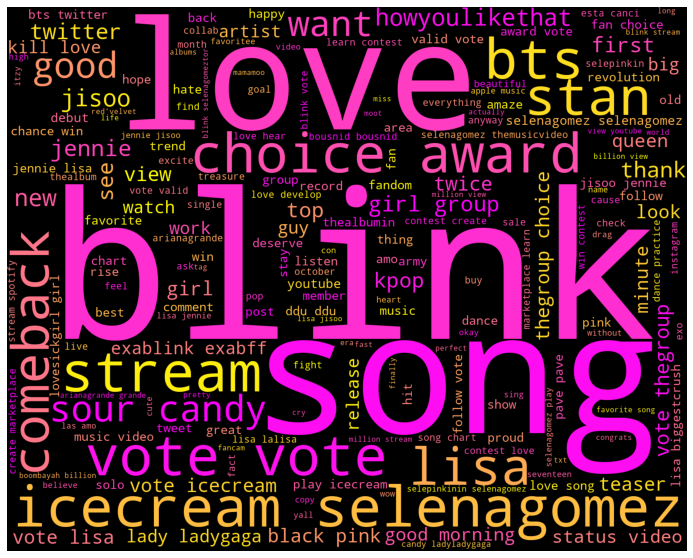

In [12]:
# 블랙핑크 전체 텍스트 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(width=1500, height=1200, colormap="spring").generate(bp_sentence)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis("off")

In [17]:
# 블랙핑크 동사, 형용사만 추출
bp_cont_v_adj = only_verb_adj(bp_del_unity, ["selenagomez", "ladygaga", "song", "dance"])

bp_vocab_v_adj = {}

for i in range(len(bp_cont_v_adj)) : 
    for word in bp_cont_v_adj[i] : 
        if word not in bp_vocab_v_adj : 
            bp_vocab_v_adj[word] = 0
        bp_vocab_v_adj[word] += 1
# print(vocab)

# 특정 문자의 반복수를 튜플로 보여줌, 내림차순
bp_vocab_sorted_v_adj = sorted(bp_vocab_v_adj.items(), key = lambda x : x[1], reverse=True)
# print(bp_vocab_sorted_v_adj)

# 빈도수가 낮은 것은 삭제
bp_word_to_index_v_adj={}
# bp_index_to_word={}
# 빈도수 100 이상인 단어만
for idx,(word,freq) in enumerate(bp_vocab_sorted) : 
    if freq<100 : 
        continue
    bp_word_to_index_v_adj[word]=idx+1
#     bp_index_to_word[idx+1]=word
# print(bp_word_to_index)

bp_encoded_v_adj = []
for s in bp_cont_v_adj:
    temp = []
    for w in s:
        try:
            temp.append(bp_word_to_index_v_adj[w])
        except KeyError:
            temp.append(0)
    bp_encoded_v_adj.append(temp)
# print(bp_encoded)

import numpy as np

max_len_bp_v_adj = max(len(item) for item in bp_encoded_v_adj)

for item in bp_encoded_v_adj : 
    while len(item) < max_len_bp_v_adj : 
        item.append(0)
        
bp_padded_np_v_adj = np.array(bp_encoded_v_adj)

In [18]:
bp_vocab_sorted_v_adj

[('song', 1833),
 ('selenagomez', 1387),
 ('good', 735),
 ('blackpink', 664),
 ('get', 663),
 ('new', 607),
 ('best', 557),
 ('love', 440),
 ('sour', 424),
 ('lisa', 416),
 ('dance', 411),
 ('top', 386),
 ('black', 383),
 ('big', 374),
 ('follow', 348),
 ('stan', 334),
 ('ladygaga', 290),
 ('single', 262),
 ('nct', 254),
 ('happy', 230),
 ('global', 226),
 ('korean', 203),
 ('valid', 200),
 ('spotify', 198),
 ('queen', 196),
 ('first', 195),
 ('favorite', 191),
 ('kill', 182),
 ('high', 177),
 ('social', 165),
 ('lovesickgirl', 164),
 ('hot', 157),
 ('hear', 154),
 ('itzy', 148),
 ('see', 147),
 ('female', 147),
 ('great', 143),
 ('live', 141),
 ('old', 139),
 ('listen', 137),
 ('digital', 137),
 ('bad', 120),
 ('buy', 113),
 ('want', 106),
 ('biggestcrush', 104),
 ('proud', 102),
 ('contest', 102),
 ('seventeen', 97),
 ('stream', 93),
 ('blink', 90),
 ('una', 88),
 ('second', 83),
 ('lyric', 81),
 ('daily', 79),
 ('play', 79),
 ('lady', 79),
 ('win', 77),
 ('young', 76),
 ('chart', 76

(-0.5, 1499.5, 1199.5, -0.5)

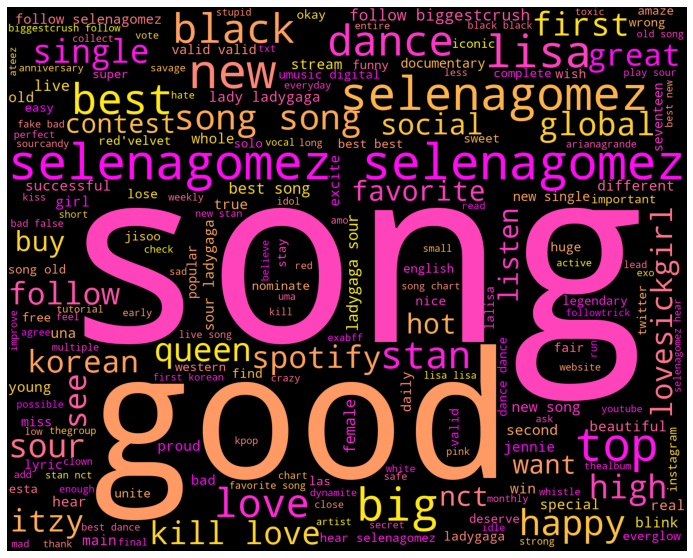

In [19]:
# 블랙핑크 동사, 형용사만 추출한 것 워드클라우드
bp_total_txt_v_adj = []

# 1차원 리스트로 만들기
for List in bp_cont_v_adj : 
    bp_total_txt_v_adj.extend(List)

while 'blackpink' in bp_total_txt_v_adj:    
    bp_total_txt_v_adj.remove("blackpink") # 'blackpink' 삭제, 특정 단어의 count 수가 너무 많으면 wordcloud에 그 단어만 보이기 때문
    
bp_sentence_v_adj = ' '.join(s for s in bp_total_txt_v_adj)   # 하나의 텍스트로 통합

from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(width=1500, height=1200, colormap="spring").generate(bp_sentence_v_adj)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis("off")

In [15]:
# word2vec을 통해서 블랙핑크 단어 연관성 파악
from gensim.models import Word2Vec

model_bp_vadj = Word2Vec(sentences=bp_cont_v_adj, vector_size=100, window=3, min_count=3, workers=3, sg=0)
# model_result_bp_vadj = model_bp_vadj.wv.most_similar(positive=["selenagomez"],topn=50)
# print(model_result_bp_vadj)

# 벡터 값 csv로
df_bp_md = pd.DataFrame(model_bp_vadj.wv.vectors)
df_bp_md.to_csv("./datas/w2v_md_bp_vadj.tsv", sep="\t", index=False)

# 키 값 csv로
df_bp_wd = pd.DataFrame(model_bp_vadj.wv.index_to_key)
df_bp_wd.to_csv("./datas/w2v_wd_bp_vadj.tsv", sep="\t", index=False)

# https://projector.tensorflow.org/
# 위 홈페이지를 통해 시각화 가능

In [20]:
# 유정님 유튜브 댓글 크롤링
df_bts_yu = pd.read_csv("./방탄소년단_20221020101234_commnet_total.csv")
bts_yu_val = df_bts_yu.values   # 값만 추출

pre_bts_yu = leave_only_txt(bts_yu_val)

# 진혁 트위터 트윗 크롤링(곡 발매전 3개월)
import pandas as pd
df_bts_bf = pd.read_csv("./bts_dynamite_bf_release_200521~200820_수정.csv",header=None)
df_bts_bf.rename(columns={0:"text"},inplace=True)

import re
for i in range(len(df_bts_bf["text"])) : 
    df_bts_bf["text"][i] = re.sub("[\[\]|\<\>|\{\}|\(\)]","",str(df_bts_bf["text"][i]))


pre_bts_ahn_bf = df_bts_bf.values.tolist() # 값 추출 후 nd.array -> list


# 진혁 트위터 트윗 크롤링(곡 발매후 3개월)
df_bts_af = pd.read_csv("./bts_dynamite_af_release_200821~201120_수정.csv", header=None)
df_bts_af.rename(columns={0:"text"},inplace=True)

for i in range(len(df_bts_af["text"])) : 
    df_bts_af["text"][i] = re.sub("[\[\]|\<\>|\{\}|\(\)]","",str(df_bts_af["text"][i]))
    
pre_bts_ahn_af = df_bts_af.values.tolist()

# 하나의 리스트에 append
bts_txt_lists = []
for List1 in pre_bts_yu : 
    bts_txt_lists.append(List1)
    
for List2 in pre_bts_ahn_bf : 
    bts_txt_lists.append(List2)
    
for List3 in pre_bts_ahn_af : 
    bts_txt_lists.append(List3)

bts_final_pre = filter_token_stem(bts_txt_lists)

bts_unity = unity_word(bts_final_pre)

bts_del_unity = del_word(bts_unity)

bts_vocab = {}

for i in range(len(bts_del_unity)) : 
    for word in bts_del_unity[i] : 
        if word not in bts_vocab : 
            bts_vocab[word] = 0
        bts_vocab[word] += 1
# print(vocab)

# 특정 문자의 반복수를 튜플로 보여줌, 내림차순
bts_vocab_sorted = sorted(bts_vocab.items(), key = lambda x : x[1], reverse=True)
print(bts_vocab_sorted)

bts_word_to_index={}
# bp_index_to_word={}

# 빈도수 100 이상인 단어만
for idx,(word,freq) in enumerate(bts_vocab_sorted) : 
    if freq<100 : 
        continue
    bts_word_to_index[word]=idx+1
#     bts_index_to_word[idx+1]=word
print(bts_word_to_index)

bts_encoded = []
for s in bts_del_unity:
    temp = []
    for w in s:
        try:
            temp.append(bts_word_to_index[w])
        except KeyError:
            temp.append(0)
    bts_encoded.append(temp)
# print(bts_encoded)

# 제일 긴 문장 기준으로 다른 문장 길이 맞추기
import numpy as np

max_len_bts = max(len(item) for item in bts_encoded)

for item in bts_encoded : 
    while len(item) < max_len_bts : 
        item.append(0)
        
bts_padded_np = np.array(bts_encoded)
# print(bts_padded_np)

[('bts', 18295), ('twitter', 7356), ('army', 2241), ('love', 2076), ('vote', 2062), ('like', 1820), ('song', 1781), ('dynamite', 1673), ('get', 1604), ('thank', 1152), ('favorite', 938), ('group', 773), ('stream', 741), ('see', 732), ('good', 725), ('amas', 671), ('jimin', 650), ('best', 622), ('music', 605), ('jungkook', 580), ('artist', 580), ('want', 574), ('canci', 566), ('happy', 560), ('taehyung', 553), ('first', 498), ('watch', 490), ('esta', 481), ('play', 478), ('pop', 477), ('video', 468), ('world', 462), ('suga', 458), ('look', 457), ('listen', 449), ('follow', 443), ('amo', 431), ('work', 423), ('social', 417), ('new', 415), ('top', 414), ('youtube', 409), ('feel', 407), ('hope', 407), ('fan', 399), ('stan', 384), ('life', 360), ('rock', 357), ('hear', 350), ('kpop', 346), ('jin', 335), ('spotify', 326), ('duo', 325), ('yoongi', 323), ('chart', 317), ('back', 314), ('live', 307), ('kim', 302), ('show', 301), ('btsarmy', 300), ('bighit', 292), ('night', 288), ('con', 287), (

In [17]:
# 방탄 텍스트를 한 리스트 안에 삽입
bts_total_txt = []
for List in bts_del_unity : 
    bts_total_txt.extend(List)

while 'bts' in bts_total_txt:    
    bts_total_txt.remove("bts") # 'bts' 삭제

# 리스트 안 텍스트를 하나로 합침
bts_sentence = ' '.join(s for s in bts_total_txt)

(-0.5, 1499.5, 1199.5, -0.5)

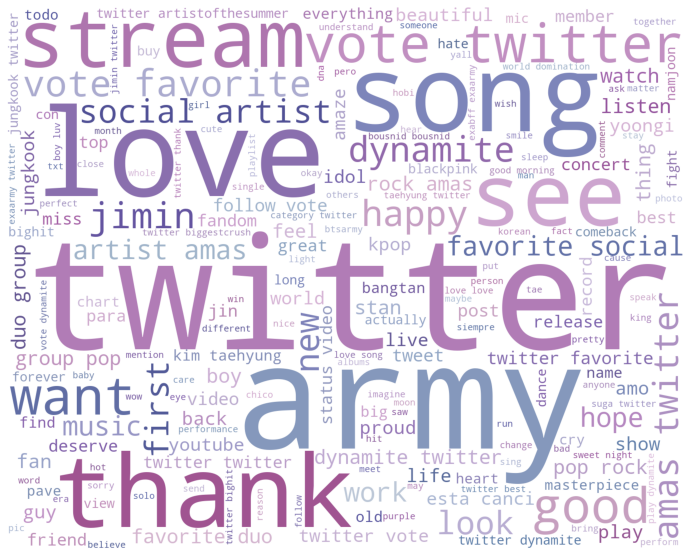

In [18]:
# 방탄 전체 텍스트를 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(width=1500, height=1200,background_color="white",
                 color_func=color_func).generate(bts_sentence)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis("off")

In [21]:
# 방탄 텍스트 중 동사, 형용사 특정 단어만 추출
bts_cont_v_adj = only_verb_adj(bts_del_unity,["dance"])

bts_vocab_v_adj = {}

for i in range(len(bts_cont_v_adj)) : 
    for word in bts_cont_v_adj[i] : 
        if word not in bts_vocab_v_adj : 
            bts_vocab_v_adj[word] = 0
        bts_vocab_v_adj[word] += 1
# print(vocab)

# 특정 문자의 반복수를 튜플로 보여줌, 내림차순
bts_vocab_sorted_v_adj = sorted(bts_vocab_v_adj.items(), key = lambda x : x[1], reverse=True)
print(bts_vocab_sorted_v_adj)

bts_word_to_index_v_adj={}
# bp_index_to_word={}

# 빈도수 100 이상인 단어만
for idx,(word,freq) in enumerate(bts_vocab_sorted_v_adj) : 
    if freq<100 : 
        continue
    bts_word_to_index_v_adj[word]=idx+1
#     bts_index_to_word[idx+1]=word
print(bts_word_to_index_v_adj)

bts_encoded_v_adj = []
for s in bts_cont_v_adj:
    temp = []
    for w in s:
        try:
            temp.append(bts_word_to_index_v_adj[w])
        except KeyError:
            temp.append(0)
    bts_encoded_v_adj.append(temp)
# print(bts_encoded)

# 제일 긴 문장 기준으로 다른 문장 길이 맞추기
import numpy as np

max_len_bts_v_adj = max(len(item) for item in bts_encoded_v_adj)

for item in bts_encoded : 
    while len(item) < max_len_bts_v_adj : 
        item.append(0)
        
bts_padded_np_v_adj = np.array(bts_encoded_v_adj)
# print(bts_padded_np)

[('get', 811), ('good', 718), ('dynamite', 701), ('favorite', 662), ('happy', 560), ('best', 516), ('love', 474), ('bts', 443), ('twitter', 421), ('social', 417), ('new', 415), ('top', 346), ('follow', 306), ('big', 280), ('live', 233), ('great', 227), ('song', 221), ('see', 214), ('first', 199), ('old', 198), ('listen', 195), ('dance', 190), ('beautiful', 186), ('sweet', 180), ('spotify', 177), ('black', 172), ('hear', 171), ('una', 165), ('thank', 163), ('hot', 162), ('korean', 156), ('proud', 141), ('whole', 141), ('stan', 139), ('bad', 139), ('army', 138), ('mic', 132), ('single', 128), ('different', 124), ('true', 109), ('feel', 106), ('want', 105), ('nice', 102), ('buy', 102), ('global', 101), ('light', 99), ('wish', 98), ('real', 93), ('free', 93), ('able', 89), ('nct', 85), ('second', 84), ('high', 83), ('bighit', 83), ('perfect', 82), ('suga', 77), ('sad', 73), ('wrong', 73), ('miss', 72), ('english', 68), ('special', 68), ('stream', 66), ('win', 66), ('lose', 66), ('lyric', 6

C:\Users\jhahn\AppData\Local\Temp\ipykernel_1680\1295439233.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bts_padded_np_v_adj = np.array(bts_encoded_v_adj)


(-0.5, 1499.5, 1199.5, -0.5)

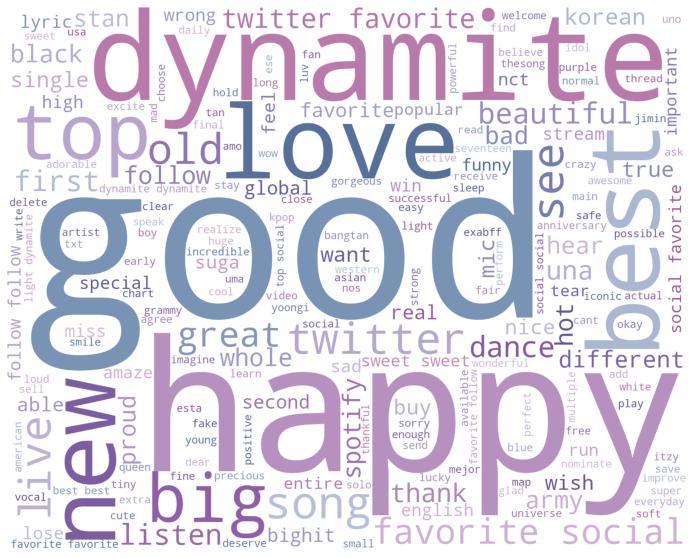

In [23]:
# 방탄 텍스트를 한 리스트 안에 삽입
bts_total_txt_v_adj = []
for List in bts_cont_v_adj : 
    bts_total_txt_v_adj.extend(List)

while 'bts' in bts_total_txt_v_adj:    
    bts_total_txt_v_adj.remove("bts") # 'bts' 삭제

# 리스트 안 텍스트를 하나로 합침
bts_sentence_v_adj = ' '.join(s for s in bts_total_txt_v_adj)

# 방탄 전체 텍스트를 워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(width=1500, height=1200,background_color="white",
                 color_func=color_func).generate(bts_sentence_v_adj)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis("off")

In [21]:
# word2vec을 통해서 방탄 단어 연관성 파악
from gensim.models import Word2Vec

model_bts_vadj = Word2Vec(sentences=bts_cont_v_adj, vector_size=100, window=3, min_count=3, workers=3, sg=0)
# model_result_bts_vadj = model_bts_vadj.wv.most_similar(positive=["selenagomez"],topn=50)
# print(model_result_bp_vadj)

df_bts_md = pd.DataFrame(model_bts_vadj.wv.vectors)
df_bts_md.to_csv("./datas/w2v_md_bts_vadj.tsv", sep="\t", index=False)

df_bts_wd = pd.DataFrame(model_bts_vadj.wv.index_to_key)
df_bts_wd.to_csv("./datas/w2v_wd_bts_vadj.tsv", sep="\t", index=False)

# https://projector.tensorflow.org/
# 위 홈페이지를 통해 시각화 가능

In [22]:
# word2vec을 통해 블핑, 방탄 하나로 합쳐서 연관성 파악
from gensim.models import Word2Vec

combine_bp_bts = []
for Lists in bp_cont_v_adj : 
    combine_bp_bts.append(Lists)
    
for Lists in bts_cont_v_adj : 
    combine_bp_bts.append(Lists)

model_bpbts_vadj = Word2Vec(sentences=combine_bp_bts, vector_size=100, window=3, min_count=3, workers=3, sg=0)
# model_result_bts_vadj = model_bts_vadj.wv.most_similar(positive=["selenagomez"],topn=50)
# print(model_result_bp_vadj)

df_bpbts_md = pd.DataFrame(model_bpbts_vadj.wv.vectors)
df_bpbts_md.to_csv("./datas/w2v_md_bpbts_vadj.tsv", sep="\t", index=False)

df_bpbts_wd = pd.DataFrame(model_bpbts_vadj.wv.index_to_key)
df_bpbts_wd.to_csv("./datas/w2v_wd_bpbts_vadj.tsv", sep="\t", index=False)

In [23]:
# 블랙핑크 감성 지수 비지도 학습 ver
bp_str_txtlist = []
for List in bp_unity : 
    j = " ".join(s for s in List)
    bp_str_txtlist.append(j)
bp_str_txtlist

bp_txt = [word[0] for word in bp_txt_lists]
bp_txt

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
# polarity_score로 하나의 텍스트에 대해 각 부정/객관/긍정 그리고 총 합한 감성지수 출력(-1~1)
senti_score = senti_analyzer.polarity_scores(bp_txt[7])
senti_score
# print(senti_score["compound"])

senti_bp = []
sent_col_name = ["neg", "neu", "pos", "compound"]
for sentence in bp_txt :
    dict1 = senti_analyzer.polarity_scores(sentence)
    dict1_list = [values for key, values in dict1.items()]
    senti_bp.append(dict1_list)
# print(senti_bp)

df_senti_bp = pd.DataFrame(senti_bp,columns=sent_col_name)
df_senti_bp.info()

df_senti_bp.mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   neg       20050 non-null  float64
 1   neu       20050 non-null  float64
 2   pos       20050 non-null  float64
 3   compound  20050 non-null  float64
dtypes: float64(4)
memory usage: 626.7 KB


neg         0.036797
neu         0.821398
pos         0.136372
compound    0.223923
dtype: float64

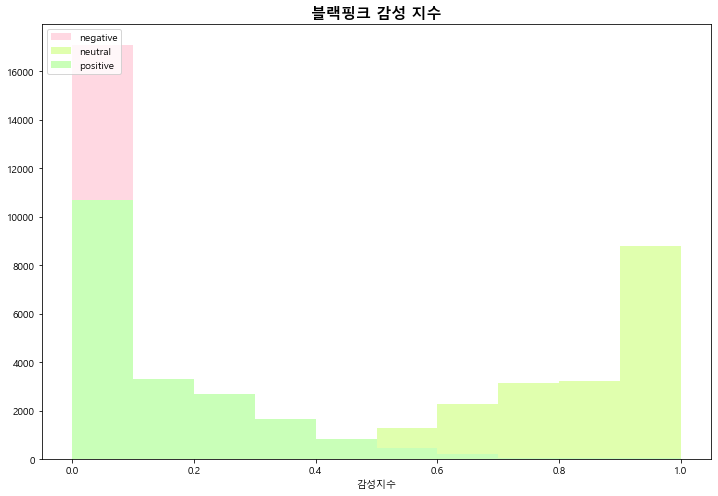

In [43]:
# 블랙핑크 감성 분석 시각화(블로그에서 compound가 보통 0.1 이상이면 긍정이라고 나와있음)
# https://techblog-history-younghunjo1.tistory.com/111
import matplotlib.pyplot as plt
figure,ax = plt.subplots(figsize=(12,8))

# ax.plot([1,2,3], [3,2,1])
# figure.set_facecolor('#888888')
# ax.patch.set_facecolor('#FFFFFF') ## axes 배경색

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# plt.hist((df_senti_bp["neg"],df_senti_bp["neu"],df_senti_bp["pos"],df_senti_bp["compound"])
#          , bins=5, label="negative")
plt.hist(df_senti_bp["neg"], bins=10, label="negative", color="#FF80A0",alpha=0.3)
plt.hist(df_senti_bp["neu"], bins=10, label="neutral", color="#E0FFAE")
plt.hist(df_senti_bp["pos"], bins=10, label="positive", color="#C9FFB8")
# plt.hist(df_senti_bp["compound"], bins=10, label="compound", color="#CCCCCC")
plt.legend(loc='upper left')
plt.xlabel("감성지수")

plt.title("블랙핑크 감성 지수",fontdict = {"fontsize":15, "fontweight":"bold"})
plt.show()

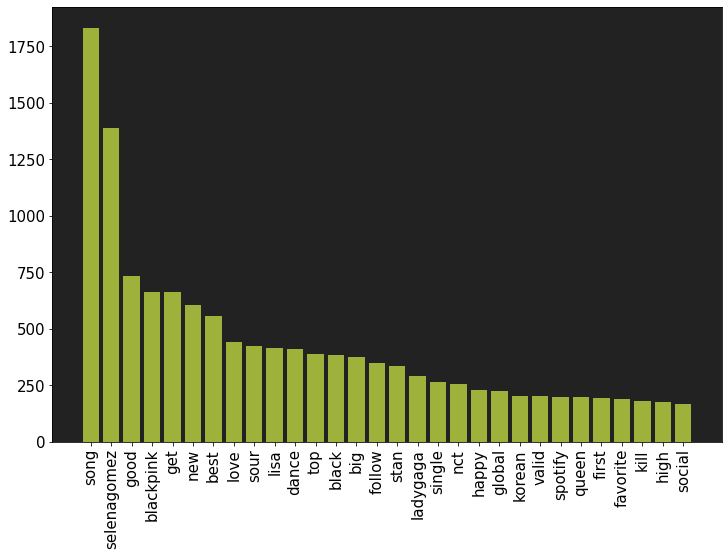

In [22]:
import matplotlib.pyplot as plt
L1 = [tup[0] for tup in bp_vocab_sorted_v_adj]
L2 = [tup[1] for tup in bp_vocab_sorted_v_adj]

import matplotlib.pyplot as plt
figure,ax = plt.subplots(figsize=(12,8))

# figure.set_facecolor('#888888')
ax.patch.set_facecolor('#222222') ## axes 배경색

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.bar(L1[:30],L2[:30],color="#9EB23B")
plt.xticks(rotation=90)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)

plt.show()

In [25]:
# 방탄 감성 지수 비지도 학습 ver
bts_str_txtlist = []
for List in bts_unity : 
    j = " ".join(s for s in List)
    bts_str_txtlist.append(j)
# bts_str_txtlist

bts_txt = [word[0] for word in bts_txt_lists]
bts_txt

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
# polarity_score로 하나의 텍스트에 대해 각 부정/객관/긍정 그리고 총 합한 감성지수 출력(-1~1)
# senti_score = senti_analyzer.polarity_scores(bts_txt[7])
# senti_score
# print(senti_score["compound"])

senti_bts = []
sent_col_name = ["neg", "neu", "pos", "compound"]
for sentence in bts_txt :
    dict2 = senti_analyzer.polarity_scores(sentence)
    dict2_list = [values for key, values in dict2.items()]
    senti_bts.append(dict2_list)
# print(senti_bp)

df_senti_bts = pd.DataFrame(senti_bts,columns=sent_col_name)
print(df_senti_bts.info())

print(df_senti_bp.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22061 entries, 0 to 22060
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   neg       22061 non-null  float64
 1   neu       22061 non-null  float64
 2   pos       22061 non-null  float64
 3   compound  22061 non-null  float64
dtypes: float64(4)
memory usage: 689.5 KB
None
neg         0.036797
neu         0.821398
pos         0.136372
compound    0.223923
dtype: float64


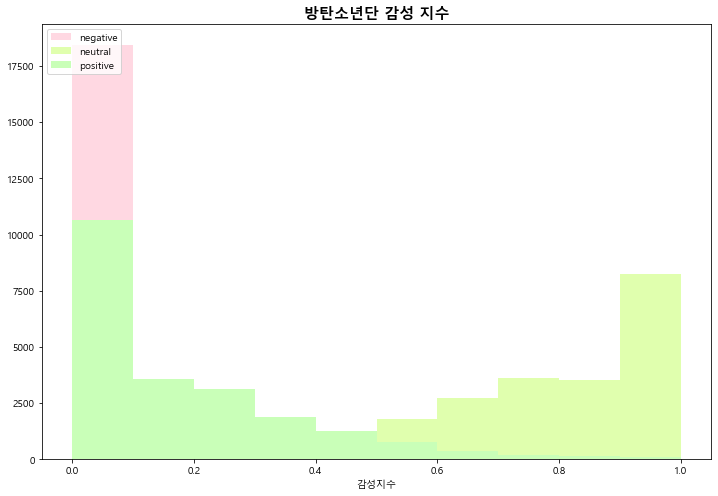

In [33]:
# 방탄 감성 분석 시각화
import matplotlib.pyplot as plt
figure = plt.subplots(figsize=(12,8))

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

# plt.hist((df_senti_bp["neg"],df_senti_bp["neu"],df_senti_bp["pos"],df_senti_bp["compound"])
#          , bins=5, label="negative")
plt.hist(df_senti_bts["neg"], bins=10, label="negative", color="#FF80A0",alpha=0.3)
plt.hist(df_senti_bts["neu"], bins=10, label="neutral", color="#E0FFAE")
plt.hist(df_senti_bts["pos"], bins=10, label="positive", color="#C9FFB8")
# plt.hist(df_senti_bts["compound"], bins=10, label="compound", color="#CCCCCC")
plt.legend(loc='upper left')
plt.xlabel("감성지수")

plt.title("방탄소년단 감성 지수",fontdict = {"fontsize":15, "fontweight":"bold"})
plt.show()

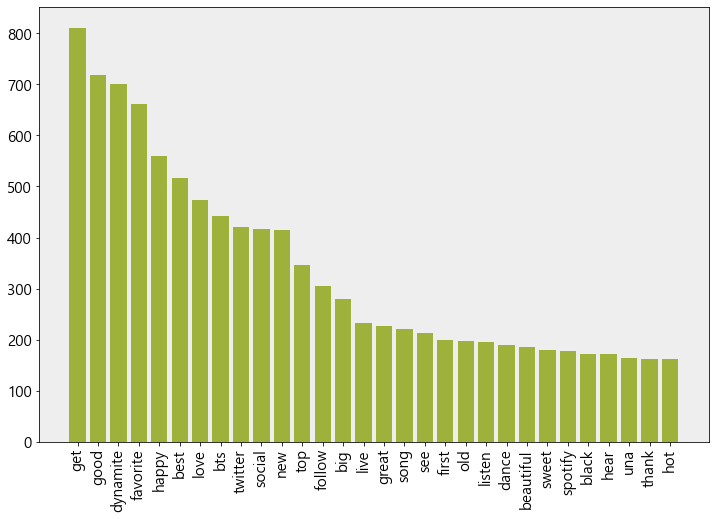

In [24]:
import matplotlib.pyplot as plt
L3 = [tup[0] for tup in bts_vocab_sorted_v_adj]
L4 = [tup[1] for tup in bts_vocab_sorted_v_adj]

import matplotlib.pyplot as plt
figure,ax = plt.subplots(figsize=(12,8))

# figure.set_facecolor('#888888')
ax.patch.set_facecolor('#EEEEEE') ## axes 배경색

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.bar(L3[:30],L4[:30],color="#9EB23B")
plt.xticks(rotation=90)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)

plt.show()

In [27]:
# #객체
# G = nx.Graph()

# #노드 설정(W 3개, F 4개)
# for i in range(len(df_pos.columns)):
#     G.add_node(df_pos.columns[i])

    
# #----------------------------------------- 엣지와 가중치 리스트 설정을 한번에! 
# num_pre = 0
# edge_w = [] #가중치 리스트. for문을 통해 가중치(weight) 값을 하나하나 쌓을것 
# size = 0.1

# for i in range(len(df_pos.columns)):
#     for j in range(len(df_pos.columns)):
#         if i != j :
#             #이 경우에만 엣지 설정 -> 자기자신에 대해서는 X, 다만 W끼리, F끼리도 엣지 설정할 수 있음 (가중치만 안 넣어주면 됨)
#             G.add_edge(df_pos.columns[i], df_pos.columns[j])
#             #엣지 가중치 추가
#             if num_pre < len(G.edges): #num_pre의 기본값인 0보다 len(G.edges)가 크다면 (즉, 엣지가 하나 이상 만들어진 경우)
#                 num_pre = len(G.edges) #num_pre 값을 len(G.edges)로 바꿔줌
#                 weight = 0 #가중치 초기화 : W끼리/ F끼리의 엣지라면 0으로 넣게됨.
                
#                 ## 이제 weight를 추가해보자. (weight는 W와 F 간에만 존재)
#                 if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index): #i에 해당하는 F 와 j에 해당하는 W값이 존재(True) 한다면
#                     if df_tr[df_pos.columns[i]][df_pos.columns[j]]: #가중치값이 존재(True)한다면
#                         weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size #weight에 그 값을 넣기
                        
#                 elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index): #반대로, j에 해당하는 F와 i에 해당하는 W 값이 존재한다면
#                     if df_tr[df_pos.columns[j]][df_pos.columns[i]]: #그리고 가중치값이 존재한다면
#                         weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size #weight에 그 값을 넣기 
                        
#                 #weight(가중치) 리스트화
#                 edge_w.append(weight)
# #---------------------------------------------   
        
# #좌표 설정
# pos = {}
# for i in range(len(df_pos.columns)):
#     node = df_pos.columns[i]
#     pos[node] = (df_pos[node][0],df_pos[node][1])
    
# #그리기
# nx.draw(G, pos, with_labels=True,
#                font_size = 16, node_size = 1000, node_color = 'k', font_color= 'w', width = edge_w) #width에 가중치 리스트 설정)
# plt.show()